# Feature Detection

- 학번 : 20223075 
- 이름 : 목진협

---

OpenCV를 사용하여 다음과 같은 다양한 feature detection 알고리즘을 사용해본다.

- Harris corner detection
- FAST
- ORB (Oriented FAST and Rotated BRIEF)
- SIFT (Scale-Invariant Feature Transform)
- SURF (Speeded-Up Robust Features)


**참고**

- [OpenCV tutorial - Feature Detection and Description](https://docs.opencv.org/master/db/d27/tutorial_py_table_of_contents_feature2d.html)
- [OpenCV document](https://docs.opencv.org/2.4/modules/imgproc/doc/feature_detection.html)
- [이미지 특징 추출 (데이터 사이언스 스쿨)](https://datascienceschool.net/03%20machine%20learning/03.02.05%20%EC%9D%B4%EB%AF%B8%EC%A7%80%20%ED%8A%B9%EC%A7%95%20%EC%B6%94%EC%B6%9C.html)

---

**[중요] 과제 제출 방법**
- 과제 제출 기한은 가상대학 공지사항을 참고하세요.
- 과제는 Colab에서 작성한 것을 다운받아 (파일 > 다운로드 > .ipynb 다운로드) 가상 대학에 업로드합니다. (이외의 제출 방법은 인정하지 않음)
- 제출 시 파일 제목은 '학번_이름' 으로 저장합니다.

# OpenCV 버전 변경

SIFT, SURF Feature 사용을 위해 현재 Colab 서버에 설치되어 있는 OpenCV 버전을 변경한다.

In [2]:
!pip3 uninstall opencv-python
!pip3 uninstall opencv-contrib-python
!pip3 install opencv-contrib-python==3.4.18.65

Found existing installation: opencv-python 4.7.0.72
Uninstalling opencv-python-4.7.0.72:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/cv2/*
    /usr/local/lib/python3.10/dist-packages/opencv_python-4.7.0.72.dist-info/*
    /usr/local/lib/python3.10/dist-packages/opencv_python.libs/libQt5Core-39545cc7.so.5.15.0
    /usr/local/lib/python3.10/dist-packages/opencv_python.libs/libQt5Gui-48e93776.so.5.15.0
    /usr/local/lib/python3.10/dist-packages/opencv_python.libs/libQt5Test-c38a5234.so.5.15.0
    /usr/local/lib/python3.10/dist-packages/opencv_python.libs/libQt5Widgets-e69d94fb.so.5.15.0
    /usr/local/lib/python3.10/dist-packages/opencv_python.libs/libQt5XcbQpa-c112ba75.so.5.15.0
    /usr/local/lib/python3.10/dist-packages/opencv_python.libs/libX11-xcb-69166bdf.so.1.0.0
    /usr/local/lib/python3.10/dist-packages/opencv_python.libs/libXau-00ec42fe.so.6.0.0
    /usr/local/lib/python3.10/dist-packages/opencv_python.libs/libavcodec-16a334ab.so.59.37.100
    /usr/local/lib/py

In [1]:
# 관련 패키지 임포트
import sys
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

print('python', sys.version)
print('numpy', np.__version__)
print('opencv', cv.__version__)

python 3.10.11 (main, Apr  5 2023, 14:15:10) [GCC 9.4.0]
numpy 1.22.4
opencv 3.4.18


## Google Drive와 연동하기

구글 드라이브와 colab을 연동하여 드라이브에 있는 파일들을 가져올 수 있게 한다.

- 아래 코드를 실행
- 출력된 링크를 클릭해 구글 계정 로그인 
- 로그인 후 나오는 코드를 복사하여 붙여넣기

[참고: 코랩 사용법 (데이터 사이언스 스쿨)](https://datascienceschool.net/view-notebook/f9d9fddb7cc7494a9e4be99f0e137be0/)


In [3]:
# mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


좌측의 파일 아이콘을 선택하거나 아래 명령어를 통해 파일을 확인할 수 있다.

In [4]:
!ls '/content/drive/MyDrive/Colab Notebooks/Vehicle Intelligence/'

work1


In [5]:
ROOT = '/content/drive/My Drive/Colab Notebooks/Vehicle Intelligence/work1/'

### opencv를 사용해 이미지 불러오기

- `cv.imread()`를 이용해 이미지를 불러오면 RGB가 아닌 BGR 이미지임을 유의해야 한다.

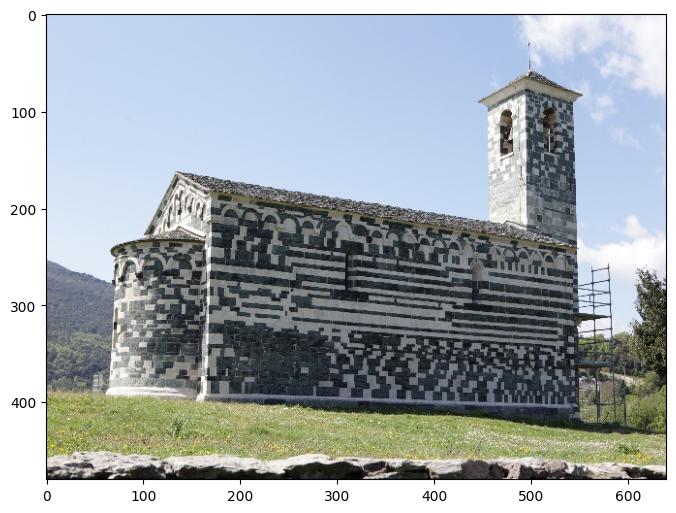

In [6]:
img = cv.imread( ROOT + 'feature/DPP_0010.JPG')
# img = cv.imread( ROOT + 'feature/DPP_0011.JPG')
# img = cv.imread( ROOT + 'feature/DPP_0013.JPG')

plt.figure(figsize=(8,8))
plt.imshow(img[:,:,::-1])
plt.show()

## Harris Corner Detection

해리스 코너 추출 함수 `cornerHarris`는 이미지 위에 커널을 이동시키면서 그레디언트의 변화량을 구하고 이 값을 적절한 기준값으로 구별하여 코너점을 찾는다.

**과제**
- 해리스 코너를 찾고, 이를 시각화한다.
- 파라미터를 바꿔가며 실험해본다.
- 제공한 이미지 외에 다른 이미지에도 적용하여 분석해 본다.

관련 함수
`dst	=	cv.cornerHarris(	src, blockSize, ksize, k[, dst[, borderType]]	)` 


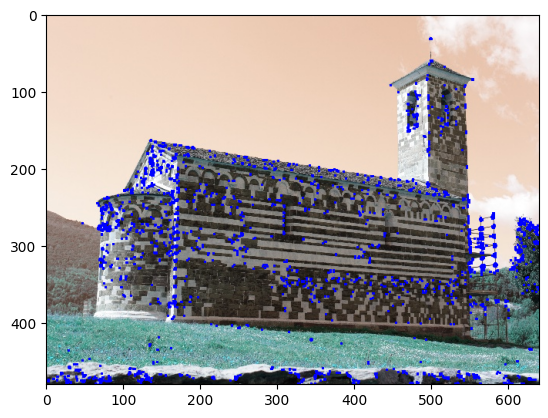

In [19]:
img = cv.imread( ROOT + 'feature/DPP_0010.JPG')
# img = cv.imread( ROOT + 'feature/DPP_0011.JPG')
# img = cv.imread( ROOT + 'feature/DPP_0013.JPG')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# To-do
gray = np.float32(gray)
dst = cv.cornerHarris(gray,2,3,0.04)

dst = cv.dilate(dst,None)
img[dst>0.03*dst.max()]=[0,0,255]
plt.imshow(img)
plt.show()

### Fast Corner Detection 

연산이 빠른 corner detection 알고리즘이다 


**과제**
- FAST feature를 찾고, 이를 시각화한다.
- 파라미터를 바꿔가며 실험해본다.
- 제공한 이미지 외에 다른 이미지에도 적용하여 분석해 본다.

관련 함수

`	retval	=	cv.FastFeatureDetector_create(	[, threshold[, nonmaxSuppression[, type]]]	)`

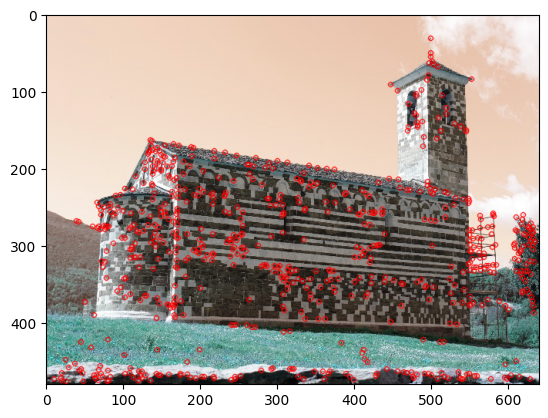

In [23]:
# img = cv.imread( ROOT + 'feature/DPP_0011.JPG')
img = cv.imread( ROOT + 'feature/DPP_0010.JPG')
# img = cv.imread( ROOT + 'feature/DPP_0013.JPG')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# To-do
fast = cv.FastFeatureDetector_create(80)
# fast = cv.FastFeatureDetector_create(n)

keypoint = fast.detect(img, None) # keypoint search
img_Fast = cv.drawKeypoints(img, keypoint, None, color=(255,0,0))
plt.imshow(img_Fast)

### ORB(Oriented FAST and Rotated BRIEF) detector

FAST 와 BRIEF를 기반으로 만들어진 알고리즘이다. 논문에서는 SURF와 SIFT보다 매우 빠르고, SURF 보다 정확한, 낮은 컴퓨팅 파워 환경에서 돌리기에 좋은 알고리즘이라 소개 한다.

**과제**
-  ORB feature를 찾고, 이를 시각화한다.
- 파라미터를 바꿔가며 실험해본다.
- 제공한 이미지 외에 다른 이미지에도 적용하여 분석해 본다.

관련 함수

`	retval	=	cv.ORB_create(	[, nfeatures[, scaleFactor[, nlevels[, edgeThreshold[, firstLevel[, WTA_K[, scoreType[, patchSize[, fastThreshold]]]]]]]]]	)`


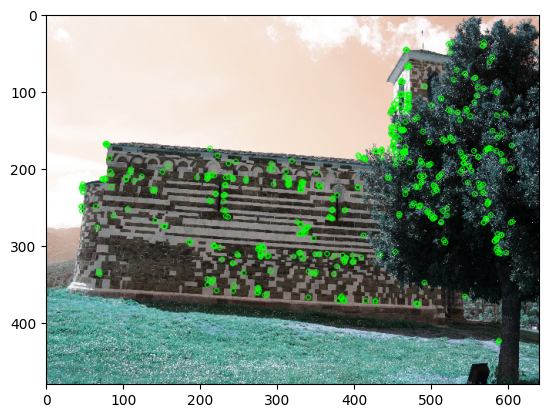

In [42]:
img = cv.imread( ROOT + 'feature/DPP_0013.JPG')
# img = cv.imread( ROOT + 'feature/DPP_0010.JPG')
# img = cv.imread( ROOT + 'feature/DPP_0011.JPG')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# To-do
orb = cv.ORB_create()
#orb = cv.ORB_create(n)
keypoint_orb = orb.detect(img, None)
keypoint_orb, des_orb = orb.compute(img, keypoint_orb)

img_orb = cv.drawKeypoints(img, keypoint_orb, None, color=(0,255,0), flags=0)
plt.imshow(img_orb)
plt.show()


### SIFT feature detection

SIFT(Scale-Invariant Feature Transform)은 특징점의 크기와 각도까지 같이 계산하여 이미지의 크기가 변하거나 회전해도 동일한 특징점을 찾을 수 있도록 하는 방법이다. 또한 특징점 근처의 이미지 특성(히스토그램)도 같이 계산해서 특징점 이미지의 모양도 구별할 수 있도록 한다.

**과제**
- SIFT feature를 찾고, 이를 시각화한다.
- 파라미터를 바꿔가며 실험해본다.
- 제공한 이미지 외에 다른 이미지에도 적용하여 분석해 본다.

관련 함수

`retval	=	cv.SIFT_create(	[, nfeatures[, nOctaveLayers[, contrastThreshold[, edgeThreshold[, sigma]]]]]	)
`

In [ ]:
# 아래 패키지를 임포트한다 
# !pip install opencv-contrib-python-nonfree

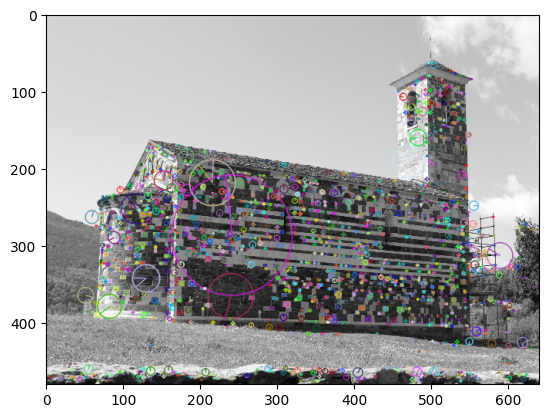

In [57]:
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread( ROOT + 'feature/DPP_0010.JPG')
# img = cv.imread( ROOT + 'feature/DPP_0011.JPG')
# img = cv.imread( ROOT + 'feature/DPP_0013.JPG')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# To-do
retval = cv.SIFT_create(1700)
# retval = cv.SIFT_create(n)
keypoint = retval.detect(gray, None)

img_sift = cv.drawKeypoints(gray, keypoint, img, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(img_sift)
plt.show()

### 추가 점수 과제

- 지금까지 사용해본 feature detection 알고리즘들을 조사해 보고, 각 알고리즘간의 차이와 장단점을 서술하시오.

Harris Corner Detection 알고리즘은 Corner를 검출하는데 쓰이는 알고리즘으로, 여러 Corner Detection 알고리즘 중에서 가장 기본이면서도 효율적인 알고리즘이다. Harris Corner Detection 알고리즘은 영상의 평행이동 및 회전에는 불변이고, 조명 변화나 아핀 변환에서도 어느 정도 강인성을 가지고 있다. 하지만, Harris Corner Detection 알고리즘은 크기 변화에는 민감한 영향을 받기 때문에 응용을 위해서는 여러 영상 데이터에서의 특징점을 추출이 필요로 한다. 

이러한 Harris 검출 알고리즘의 크기에 대한 강인성 부족 등 여러 단점을 해결한 알고리즘이 SIFT feature Detection 알고리즘이다. SIFT 알고리즘은 이미지 피라미드를 이용하여 크기 변화에 따른 특징점 검출 문제를 해결할 수 있었다. 하지만, 여러 문제 해결을 위해 이미지 피라미드를 사용하므로 속도가 느리다는 단점이 있다. SIFT 알고리즘의 속도 문제는 아직 사용해보지 않은 SURF 알고리즘이 이미지 피라미드 대신 필터의 크기를 변화시키는 방식으로 성능을 개선하였다. 

FAST Corner Detection 알고리즘은 다른 알고리즘에서 흔히 단점으로 뽑히는 실시간 응용 관점에서의 문제에 대한 해결책으로 제안한 알고리즘이다. FAST Corner Detection 알고리즘의 가장 큰 장점은 연산의 효율성이다. 이미지 내에서 코너 후보를 빠르게 식별하여 처리하기 때문에, 대규모 이미지나 실시간 응용에 효율적으로 사용될 수 있다. 게다가, 속도에 최적화된 알고리즘임에도 불구하고 특징점의 품질이 Harris Corner Detection 알고리즘 등 기존의 방법들 보다 뛰어나다는 장점을 가지고 있다. 하지만, FAST 코너 검출 알고리즘의 단점으로는, 어떤 점 x가 코너점으로 인식되면 x와 인접한 주변 점들도 코너점으로 검출되는 경우가 많다는 치명적인 단점을 가지고 있다. 

ORB detector 알고리즘은, 디스크립터 검출기 중 하나이고 특징점 검출은 지원하지 않는 BRIEF에 방향과 회전을 고려하도록 설계된 알고리즘이다. ORB 알고리즘은 디스크립터 검출이 빠른 BRIEF 알고리즘을 사용하고 특징점 검출 알고리즘으로 FAST 알고리즘을 사용하여, 연산량이 많아 실시간 응용이 어렵운 SIFT와 SURF의 대안으로 사용된다. 이러한 ORB 알고리즘도 속도와 실시간 응용력애 대한 단점이 존재한다. ORB 알고리즘은 특징점 추출과 디스크립터 생성이 빠르지만, 매칭 단계에서 특징점을 비교하기 때문에 특징점이 많아 질 수 록 인식을 수행하는 속도가 느려지는 단점이 있어 특히, 특징점이 많은 다중객체들을 실시간으로 인식하기가 어렵다.